# Titanic Project

* On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. Translated 32% survival rate.

* One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. 

* Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

## The Methodology

* Question or problem definition. 


* Acquire training and testing data. 

* Wrangle, prepare, cleanse the data. 

* Analyze, identify patterns, and explore the data. 

* Model, predict and solve the problem. 

* Visualize, report, and present the problem solving steps and final solution. 

* Supply or submit the results.

## The Question

Knowing from a training set of samples listing passengers who survived or did not survive the Titanic disaster, can our model determine based on a given test dataset not containing the survival information, if these passengers in the test dataset survived or not.

## The Data

In [324]:
# import required libraries
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [325]:
train = pd.read_csv('titanic_train.csv')
test = pd.read_csv('titanic_test.csv')

In [326]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [327]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [328]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [329]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [330]:
train.shape

(891, 12)

In [331]:
test.shape

(418, 11)

## Wrangle, prepare, cleanse the data.

In [332]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [333]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

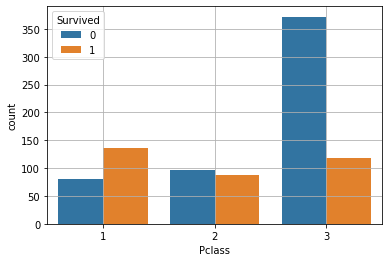

In [334]:
ax = sns.countplot(x='Pclass', hue='Survived',data=train)
ax.grid()

In [335]:
# Things to do 
# - drop the columns: cabin, passengerID, ticket
# - add a feature based on age: child, adult, old 
# - check distribution of fares paid overall and within PClass
# - check within PClass fares, whether a relationshio exists with the fare paid
# - check name column, extract values such as: honorific titles, status title, etc

# - fill missing age values. use the fare and pclass in order to assess the age
# - use a logistic regression in order to predict chances or survival
  # - select most relevant features (max 5)
  # - verify strengh of model using AAA
  # - increase robustness by using a kfold cross validation

    
# What will be new
  # Logistic regression is ... and can be implemented like this ...
    
# What will be tricky
  # 


### Age issue

In [336]:
# - 177 age values missing
# - proxies for age:
#     - Pclass
#     - Fare paid
#     - Gender

In [337]:
train = train.drop(['PassengerId','Cabin', 'Parch','Ticket'], axis = 1)

In [338]:
train['Gender'] = np.where(train['Sex'] == 'male', 1,0)


In [339]:
train.corr()

,Survived,Pclass,Age,SibSp,Fare,Gender
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.257307,-0.543351
Pclass,-0.338481,1.000000,-0.369226,0.083081,-0.549500,0.131900
Age,-0.077221,-0.369226,1.000000,-0.308247,0.096067,0.093254
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.159651,-0.114631
Fare,0.257307,-0.549500,0.096067,0.159651,1.000000,-0.182333
Gender,-0.543351,0.131900,0.093254,-0.114631,-0.182333,1.000000


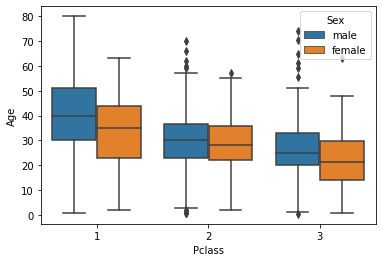

In [340]:
# 1a/ looking at age, as a function of gender and Pclass
x = train['Pclass']
y = train['Age']

sns.boxplot(x,y, data = train, hue = 'Sex' );
plt.show()

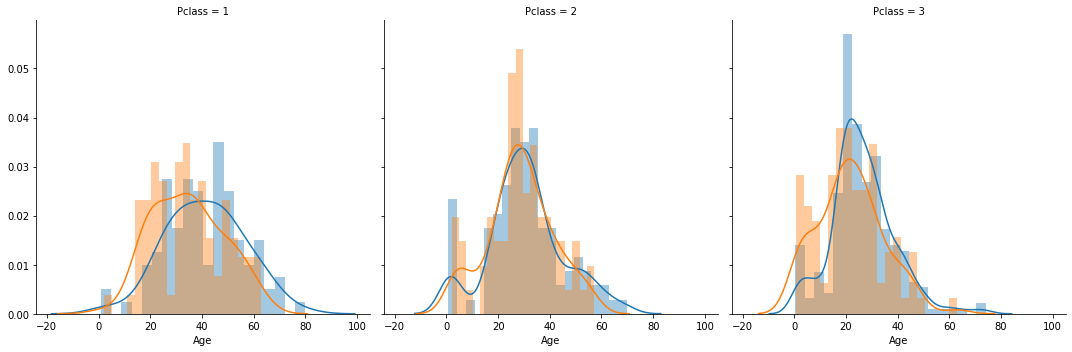

In [341]:
# 1b/ Loooking at the age distribution ber Pclass
g = sns.FacetGrid(train, col='Pclass', hue= 'Sex',height=5, aspect=1,)
g.map(sns.distplot, 'Age', bins = 20)

(0, 300)

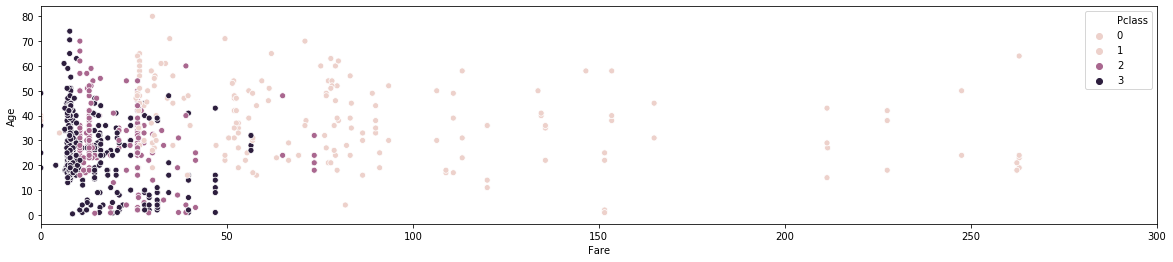

In [342]:
# 2/ Looking at the relationship between Age and fare , with Pclass

x = train['Fare']
y = train['Age']

fig, ax = plt.subplots()
fig.set_size_inches(20, 4)
sns.scatterplot(x,y, data=train, hue='Pclass')
plt.xlim(0, 300)

# >>> Probably difficult to conclude anything meaningful here

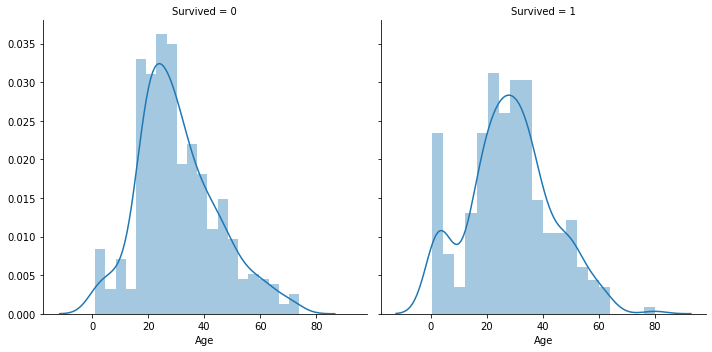

In [343]:
# 3a/ Looking at Survival Age Dsitribution

g = sns.FacetGrid(train, col='Survived', height=5, aspect=1,)
g.map(sns.distplot, 'Age', bins = 20)

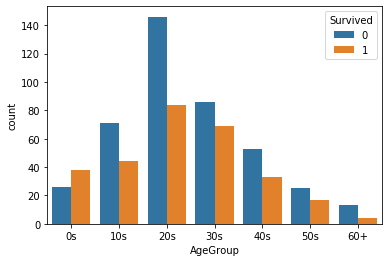

In [344]:
# 3b/ Looking at the probability of survival per age

train['AgeGroup'] = pd.cut(x=train['Age'], bins=[0,10, 20, 30, 40,50,60,70], labels=['0s', '10s', '20s', '30s', '40s', '50s','60+'])
sns.countplot(x = 'AgeGroup', hue = 'Survived', data = train)


C:\Users\delchain_default\anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


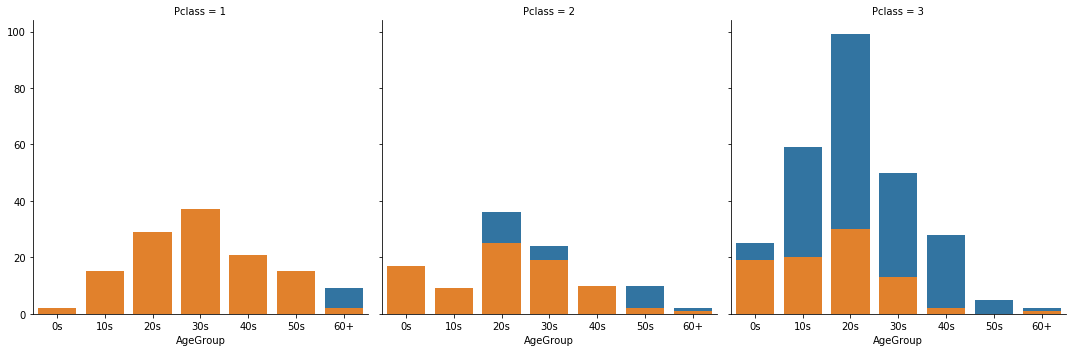

In [345]:
# 3c/ Looking at the probability of survival per age per PClass

g = sns.FacetGrid(train, col='Pclass', hue= 'Survived',height=5, aspect=1,)
g.map(sns.countplot, 'AgeGroup')

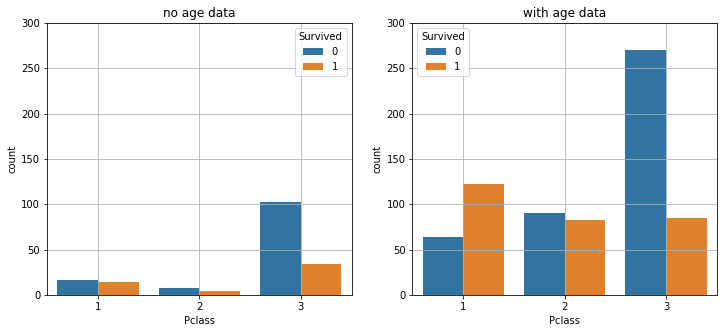

In [346]:
# 3d / Looking at where the missing ages are located in the PClass. Comparing with population with age data

no_age = train[train['Age'].isnull()]
with_age = train[train['Age'].notnull()]

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (12, 5))

sns.countplot('Pclass', hue='Survived',data=no_age, ax=ax1)
ax1.set_title('no age data')
ax1.set(ylim=(0,300))
ax1.grid()

sns.countplot('Pclass', hue='Survived',data=with_age, ax=ax2)
ax2.set_title('with age data')
ax2.set(ylim=(0,300))
ax2.grid()


In [347]:
train['Age_Data'] = np.where(train['Age'].isnull(), 0,1)
train.groupby(['Age_Data', 'Pclass'])['Survived'].value_counts()


Age_Data  Pclass  Survived
0         1       0            16
                  1            14
          2       0             7
                  1             4
          3       0           102
                  1            34
1         1       1           122
                  0            64
          2       0            90
                  1            83
          3       0           270
                  1            85
Name: Survived, dtype: int64

In [348]:
# 3e Count values and percentages
train.groupby(['Age_Data'])['Pclass'].value_counts(normalize=True)

Age_Data  Pclass
0         3         0.768362
          1         0.169492
          2         0.062147
1         3         0.497199
          1         0.260504
          2         0.242297
Name: Pclass, dtype: float64

In [349]:
# 3e Count values and percentages
train.groupby(['Age_Data', 'Pclass'])['Survived'].value_counts(normalize=True)

Age_Data  Pclass  Survived
0         1       0           0.533333
                  1           0.466667
          2       0           0.636364
                  1           0.363636
          3       0           0.750000
                  1           0.250000
1         1       1           0.655914
                  0           0.344086
          2       0           0.520231
                  1           0.479769
          3       0           0.760563
                  1           0.239437
Name: Survived, dtype: float64

### Conclusion on Age

Population without age data has 2 characteristics: 

\- more likely NOT to survive in class 1 and 2  (+12 points in death

\- more likely to come from Pclass 3  (+27 points compared to population with age data)

#### How to tackle the issue of missing Age values

1/ Looking at the Pclass

 2/ Looking at the gender: Women tend to be younger than Men on the boat 

3/ Assigning an age based on existing probabilistic distribution per Pclass and Gender, assuming normal distribution (hence applying standard deviation)

In [350]:
# Get mean age per Pclass and gender
train.groupby(['Pclass', 'Sex'])['Age'].mean()

Pclass  Sex   
1       female    34.611765
        male      41.281386
2       female    28.722973
        male      30.740707
3       female    21.750000
        male      26.507589
Name: Age, dtype: float64

In [351]:
# Get age standard deviation per Pclass and gender
train.groupby(['Pclass', 'Sex'])['Age'].std()

Pclass  Sex   
1       female    13.612052
        male      15.139570
2       female    12.872702
        male      14.793894
3       female    12.729964
        male      12.159514
Name: Age, dtype: float64

In [352]:

# THIS DOES NOT WORK :( - lets discuss


# if [train['Age'].notnull()]:
#     train['Age2'] = train['Age']
    
# elif train[train['Age'].isnull() & train['Sex'] == 'female' & train['Pclass'] == 1]:
#     train['Age2'] = 34.61 + np.random.normal(loc =0, scale = 13.61)
# elif train[train['Age'].isnull() & train['Sex'] == 'male' & train['Pclass'] == 1]:
#     train['Age2'] = 41.2813 + np.random.normal(loc = 0, scale = 15.14)
    
# elif train[train['Age'].isnull() & train['Sex'] == 'female' & train['Pclass'] == 2]:
#     train['Age2'] = 28.72 + np.random.normal(loc = 0, scale = 12.87)
# elif train[train['Age'].isnull() & train['Sex'] == 'male' & train['Pclass'] == 2]:
#     train['Age2'] = 30.74 + np.random.normal(loc = 0, scale= 14.79)

# elif train[train['Age'].isnull() & train['Sex'] == 'female' & train['Pclass'] == 3]:
#     train['Age2'] = 21.75 + np.random.normal(loc = 0, scale = 12.73) 
# elif train[train['Age'].isnull() & train['Sex'] == 'male' & train['Pclass'] == 3]:
#     train['Age2'] = 26.51 + np.random.normal(loc = 0, scale= 12.16)

    

In [353]:
# train['Age2']

In [354]:
# the easiest and laziest way to replace: complete missing age with median    
# train['Age'].fillna(train['Age'].median(), inplace = True)


In [355]:
# LEt's discuss this as well as i do not understand what is going on (even tough it works very well)
# Filling missing value of Age 

## Fill Age with the median age of similar rows according to Pclass, Parch and SibSp
# Index of NaN age rows
index_NaN_age = list(train["Age"][train["Age"].isnull()].index)

for i in index_NaN_age :
    age_med = train["Age"].median()
    age_pred = train["Age"][((train['Sex'] == train.iloc[i]["Sex"]) & (train['Pclass'] == train.iloc[i]["Pclass"]))].median()
    if not np.isnan(age_pred) :
        train['Age'].iloc[i] = age_pred
    else :
        train['Age'].iloc[i] = age_med

C:\Users\delchain_default\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [356]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Fare,Embarked,Gender,AgeGroup,Age_Data
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,7.2500,S,1,20s,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,71.2833,C,0,30s,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,7.9250,S,0,20s,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,53.1000,S,0,30s,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,8.0500,S,1,30s,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,13.0000,S,1,20s,1
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,30.0000,S,0,10s,1
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.5,1,23.4500,S,0,NaN,0
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,30.0000,C,1,20s,1


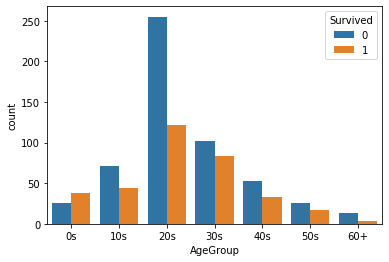

In [357]:
# run age group again

# 3b/ Looking at the probability of survival per age

train['AgeGroup'] = pd.cut(x=train['Age'], bins=[0,10, 20, 30, 40,50,60,70], labels=['0s', '10s', '20s', '30s', '40s', '50s','60+'])
sns.countplot(x = 'AgeGroup', hue = 'Survived', data = train)

C:\Users\delchain_default\anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


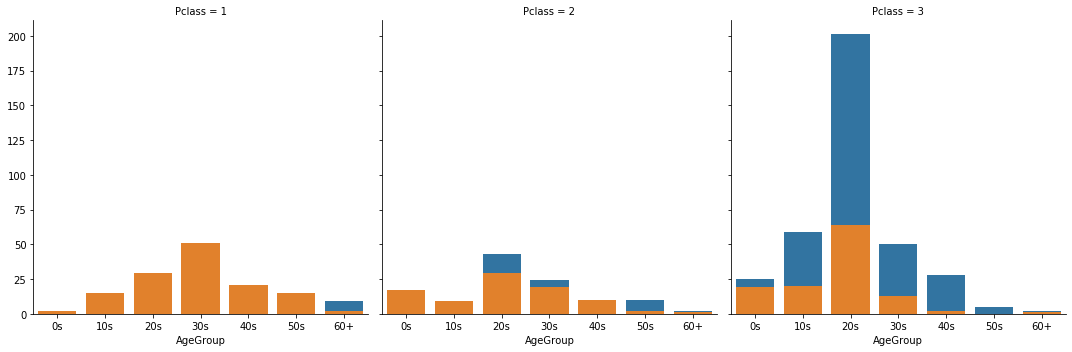

In [358]:
# 3c/ Looking at the probability of survival per age per PClass

g = sns.FacetGrid(train, col='Pclass', hue= 'Survived',height=5, aspect=1,)
g.map(sns.countplot, 'AgeGroup')

## Prepare the 2 df

In [410]:
train_df = train
test_df = test

In [411]:
# for train_df: remove unecessary columns
train_df = train_df.drop(['Name', 'AgeGroup','Age_Data', 'Sex'], axis =1)

# for train_df, fill missing embarked values with mode
train_df['Embarked'].fillna(train_df['Embarked'].value_counts().idxmax(), inplace = True)

# for train_df: transform embarked with numeric values
train_df['Embarked'].replace(to_replace='S',value=1, inplace=True)
train_df['Embarked'].replace(to_replace='C',value=2, inplace=True)
train_df['Embarked'].replace(to_replace='Q',value=3, inplace=True)

train_df.head()

,Survived,Pclass,Age,SibSp,Fare,Embarked,Gender
0,0,3,22.0,1,7.2500,1,1
1,1,1,38.0,1,71.2833,2,0
2,1,3,26.0,0,7.9250,1,0
3,1,1,35.0,1,53.1000,1,0
4,0,3,35.0,0,8.0500,1,1


In [412]:
# for test_df: fill missing values for Age
index_NaN_age = list(test_df["Age"][test_df["Age"].isnull()].index)

for i in index_NaN_age :
    age_med = test_df["Age"].median()
    age_pred = test_df["Age"][((train['Sex'] == test_df.iloc[i]["Sex"]) & (test_df['Pclass'] == test_df.iloc[i]["Pclass"]))].median()
    if not np.isnan(age_pred) :
        test_df['Age'].iloc[i] = age_pred
    else :
        test_df['Age'].iloc[i] = age_med

# for test_df: transform embarked, Sex values for numeric values
test_df['Gender'] = np.where(test_df['Sex'] == 'male', 1,0)
test_df['Embarked'].replace(to_replace='S',value=1, inplace=True)
test_df['Embarked'].replace(to_replace='C',value=2, inplace=True)
test_df['Embarked'].replace(to_replace='Q',value=3, inplace=True)

# for test_df: remove unecessary columns
test_df= test_df.drop(['PassengerId','Name', 'Sex', 'Parch', 'Cabin', 'Ticket'], axis =1)

# for test_df, replace the NaN value in Fare with median
test_df['Fare'].fillna(test_df['Fare'].median(), inplace = True)
test_df.head()

,Pclass,Age,SibSp,Fare,Embarked,Gender
0,3,34.5,0,7.8292,3,1
1,3,47.0,1,7.0000,1,0
2,2,62.0,0,9.6875,3,1
3,3,27.0,0,8.6625,1,1
4,3,22.0,1,12.2875,1,0


## Model, predict and solve the problem. 

In [416]:
X_train = train_df.drop('Survived', axis=1)
Y_train = train_df["Survived"]
X_test  = test_df
X_train.shape, Y_train.shape, X_test.shape

((891, 6), (891,), (418, 6))

In [418]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

81.03

In [419]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
4,Embarked,0.208420
3,Fare,0.001887
1,Age,-0.042859
2,SibSp,-0.356342
0,Pclass,-1.190985
5,Gender,-2.562808


Highest survival predictor of survival is Gender, then PClass